In [1]:
# 读入数据
# 数据解读页面：https://www.kaggle.com/c/titanic/data

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic-data.csv')

In [2]:
# 修正数据类型

# pandas 让这部分不再必要了，暂时先放下不管。

print titanic

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

# 提出问题

我感兴趣的问题是，哪些因素会增加乘客的存活率。

首先想到的是逃生时，妇女儿童优先的原则，因此分别检验一下。

## 性别

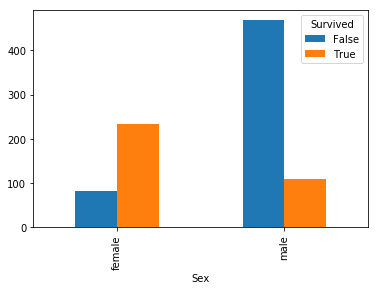

可以看出，女性存活率明显高于男性，关键时刻绅士们还是靠得住的。

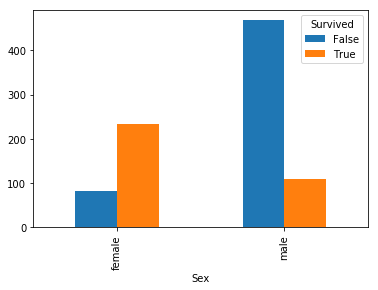

In [20]:
death_sex = pd.crosstab(titanic.Sex, titanic.Survived.astype(bool))
death_sex.plot(kind='bar')

## 年龄

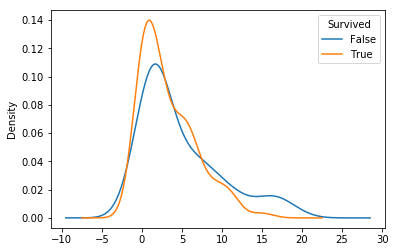

仅从年龄单一属性上来看，似乎没有什么明显的趋势。

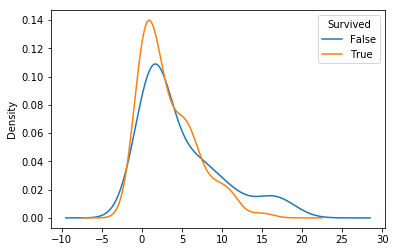

In [17]:
death_age = pd.crosstab(titanic.Age, titanic.Survived.astype(bool))
death_age.plot.kde()

## 舱位

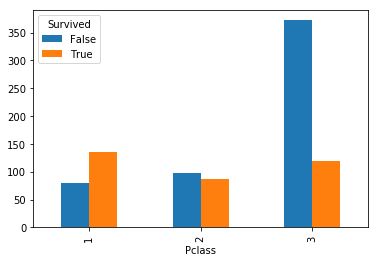

如图，一等舱幸存率明显较高。超过50%，二等舱一半对一半，三等舱则幸存率非常低。

可能有以下原因导致：

1. 头等舱不出意外应该是在最上方。为了舒适性会留出更加宽敞的人均空间，设施完善，而且不会直接撞击到冰山，
2. 三等舱应该是在船体空间最富裕的中部，人均空间小，逃生时极有可能发生堵塞、踩踏、恐慌等等恶性事件。（邮轮会设置客舱在下方么？如果会的话，三等舱很可能会直接受到冰山撞击）

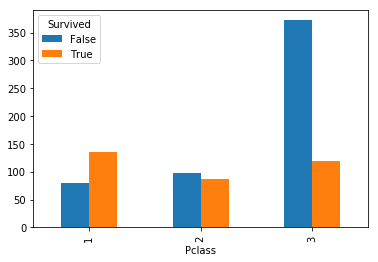

In [19]:
death_pclass = pd.crosstab(titanic.Pclass, titanic.Survived.astype(bool))
death_pclass.plot.bar()

## 兄弟姐妹以及配偶数量

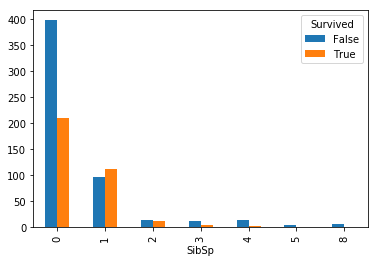

出乎意料，是否有兄弟姐妹或配偶陪伴是一个相当重要的指标，没有配偶的旅客存活率基本只有三分之一，而有一个的幸存率则超过一半。

还是爱情的力量最伟大，然而我没有。

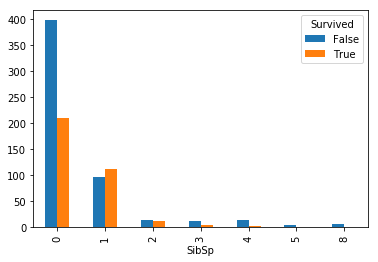

In [22]:
death_sibsp = pd.crosstab(titanic.SibSp, titanic.Survived.astype(bool))
death_sibsp.plot.bar()

## 子女／父母数量

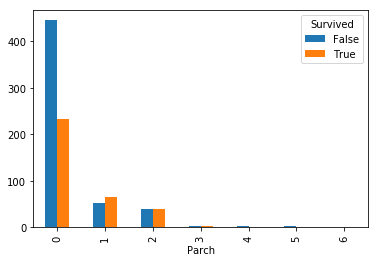

与上一条参数的图形非常相似！看来亲情爱情在遭遇灾难的时候确实都能帮助人们求生。

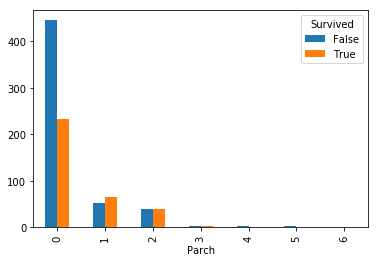

In [23]:
death_parch = pd.crosstab(titanic.Parch, titanic.Survived.astype(bool))
death_parch.plot.bar()

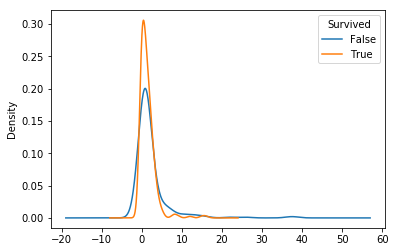

In [25]:
death_fare = pd.crosstab(titanic.Fare, titanic.Survived.astype(bool))
death_fare.plot.kde()